# __Figures for manuscript:__

## _"Automated Brain Masking of Fetal Functional MRI Data"_

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import nilearn
from nilearn import plotting
from nilearn import datasets
import nibabel as nib
import sklearn
from scipy.stats import norm
from scipy.stats.stats import pearsonr
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [6]:
sub_dice = pd.read_csv('BySubjectEvaluation.csv')

In [7]:
sub_dice.columns

Index(['Subject', 'Age (days)', 'SD Age (days)', 'Dice', 'Dice SD',
       'Sensitivity', 'Sensitivity SD', 'Specificty', 'Specificty SD',
       'Accuracy', 'Accuracy SD'],
      dtype='object')

In [8]:
pearsonr(sub_dice['Age (days)'], sub_dice['Dice'])

(0.5417732753482045, 4.838933829675793e-05)

In [9]:
pearsonr(sub_dice['Age (days)'], sub_dice['Specificty'])

(0.2786496300122021, 0.050052219484636534)

In [10]:
pearsonr(sub_dice['Age (days)'], sub_dice['Sensitivity'])

(0.22573457691770932, 0.11497200026081966)

In [11]:
pearsonr(sub_dice['Age (days)'], sub_dice['Accuracy'])

(0.2210426588137859, 0.12292155675040105)

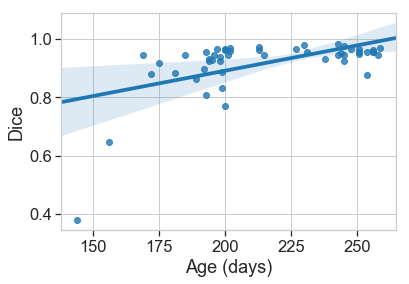

In [10]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"])
#plt.savefig('BySubject_DicevsAge.png',bbox_inches='tight')

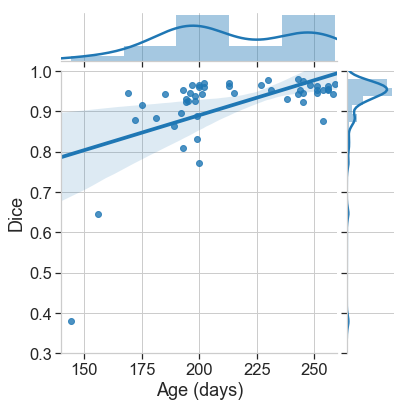

In [11]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
avg_dice_plot = sns.jointplot(x=sub_dice["Age (days)"], y=sub_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1))

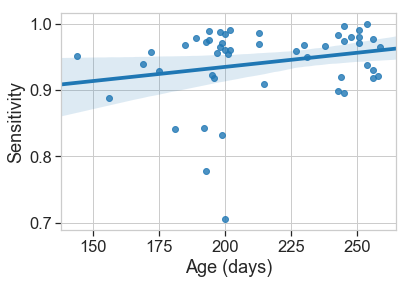

In [12]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Sensitivity"])
#plt.savefig('BySubject_SensitivityvsAge.png',bbox_inches='tight')

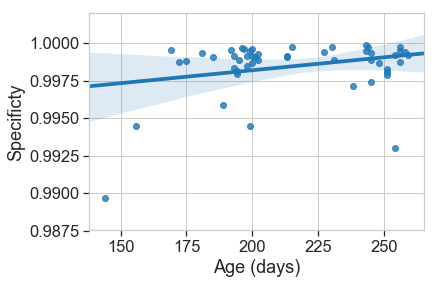

In [13]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Specificty"])
#plt.savefig('BySubject_SpecificityvsAge.png',bbox_inches='tight')

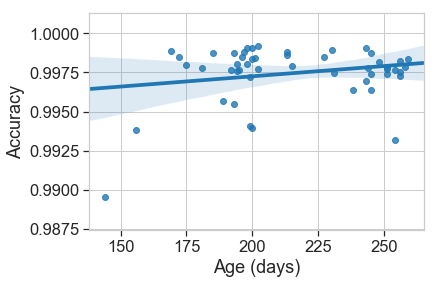

In [14]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=sub_dice["Age (days)"], y=sub_dice["Accuracy"])
#plt.savefig('BySubject_AccuracyvsAge.png',bbox_inches='tight')

In [15]:
vol_dice = pd.read_csv('ByVolumeEvaluation.csv')

In [18]:
len(vol_dice)

211

In [16]:
vol_dice.columns

Index(['Subject', 'Age', 'Run', 'Volume short', 'Volume long', 'Accuracy',
       'Dice', 'Sensitivity', 'Specificty'],
      dtype='object')

In [17]:
vol_dice.rename(columns={'Age': 'Age (days)'}, inplace=True)

In [23]:
vol_dice['Dice'].describe()

count    211.000000
mean       0.897857
std        0.141421
min        0.077857
25%        0.910895
50%        0.944162
75%        0.962499
max        0.983625
Name: Dice, dtype: float64

In [25]:
vol_dice

,Subject,Age (days),Run,Volume short,Volume long,Accuracy,Dice,Sensitivity,Specificty
0,2006-T1,245,run1,vol0017.nii.npy,zpr_2006-T1_run1_vol0017.nii.npy,0.995056,0.887209,0.805026,0.999760
1,2013-T1,213,run1,vol0160.nii.npy,zpr_2013-T1_run1_vol0160.nii.npy,0.998780,0.970264,0.988062,0.999000
2,2013-T1,213,run1,vol0060.nii.npy,zpr_2013-T1_run1_vol0060.nii.npy,0.998642,0.966669,0.969251,0.999252
3,2013-T1,213,run1,vol0078.nii.npy,zpr_2013-T1_run1_vol0078.nii.npy,0.998672,0.967095,0.988566,0.998875
4,2013-T1,213,run1,vol0043.nii.npy,zpr_2013-T1_run1_vol0043.nii.npy,0.998927,0.974914,0.982456,0.999284
5,2013-T1,213,run1,vol0127.nii.npy,zpr_2013-T1_run1_vol0127.nii.npy,0.998636,0.967836,0.991075,0.998796
6,2019-T1,144,run1,vol0121.nii.npy,zpr_2019-T1_run1_vol0121.nii.npy,0.989997,0.395106,0.994643,0.989982
7,2019-T1,144,run1,vol0150.nii.npy,zpr_2019-T1_run1_vol0150.nii.npy,0.990525,0.402883,0.972346,0.990585
8,2019-T1,144,run2,vol0100.nii.npy,zpr_2019-T1_run2_vol0100.nii.npy,0.991102,0.424943,0.973090,0.991163
9,2019-T1,144,run2,vol0170.nii.npy,zpr_2019-T1_run2_vol0170.nii.npy,0.989507,0.382465,0.976211,0.989551


In [12]:
sub_dice_jaccard = pd.read_csv('ByVolumeDiceJaccard.csv')

In [19]:
len(sub_dice_jaccard)

205

In [24]:
sub_dice_jaccard['Dice'].describe()

count    205.000000
mean       0.945214
std        0.017885
min        0.888273
25%        0.936515
50%        0.948936
75%        0.959036
max        0.972995
Name: Dice, dtype: float64

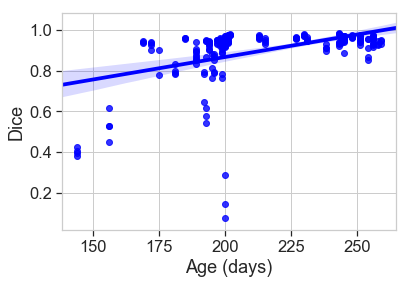

In [18]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], color="b")
#plt.savefig('AllVolumes_DicevsAge.png',bbox_inches='tight')

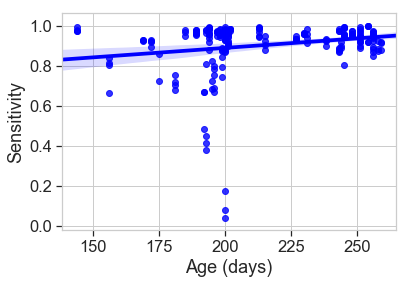

In [19]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Sensitivity"], color="b")
#plt.savefig('AllVolumes_SensitivityvsAge.png',bbox_inches='tight')

(0.985, 1.001)

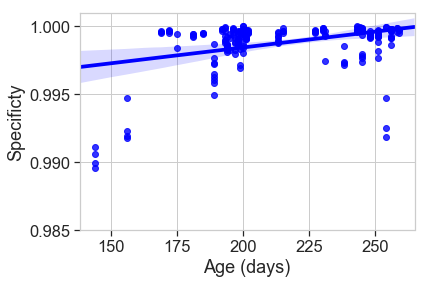

In [20]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Specificty"], color="b")
plt.ylim(0.985, 1.001)
#plt.savefig('AllVolumes_SpecificityvsAge.png',bbox_inches='tight')

(0.98, 1.0)

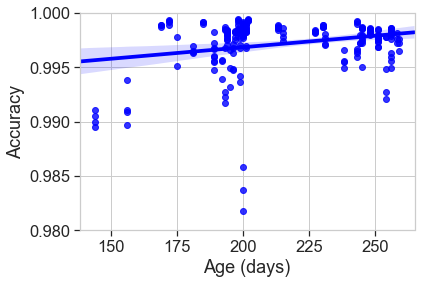

In [21]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=vol_dice["Age (days)"], y=vol_dice["Accuracy"],color="b")
plt.ylim(0.98, 1.00)
#sns.plt.xlim(0, None)
#plt.savefig('AllVolumes_AccuracyvsAge.png',bbox_inches='tight')

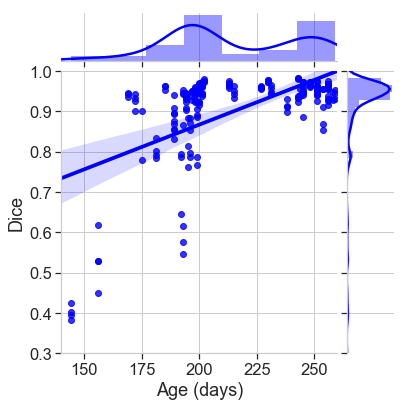

In [22]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
all_dice_plot= sns.jointplot(x=vol_dice["Age (days)"], y=vol_dice["Dice"], kind="reg",
                  xlim=(140, 260), ylim=(0.3, 1), color="b")

[[]]

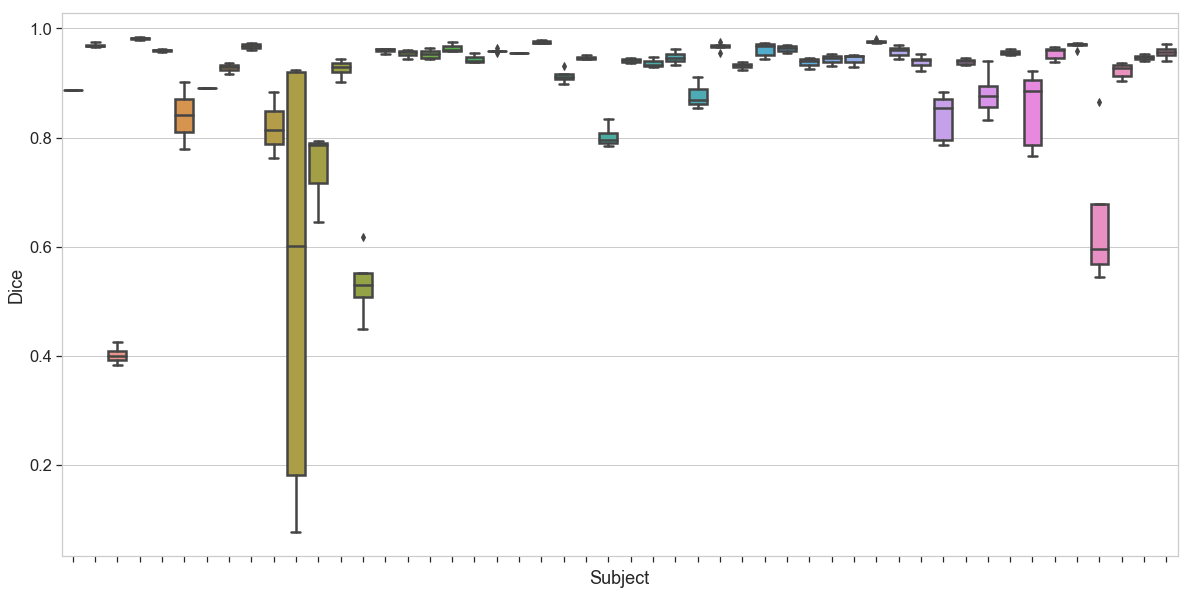

In [23]:
plt.figure(figsize=(20,10)) # this creates a figure 8 inch wide, 4 inch high
g = sns.boxplot(x=vol_dice["Subject"], y=vol_dice["Dice"])
g.set(xticklabels=[])

In [24]:
yale_dice = pd.read_csv('Yale_PatientMetrics3.csv')

In [25]:
#Remove subject that we do not have age information for
yale_dice_age = yale_dice[np.isfinite(yale_dice['Age (days)'])]

In [26]:
pearsonr(yale_dice_age['Age (days)'], yale_dice_age['Dice'])

(-0.09860013489690814, 0.420220795997443)

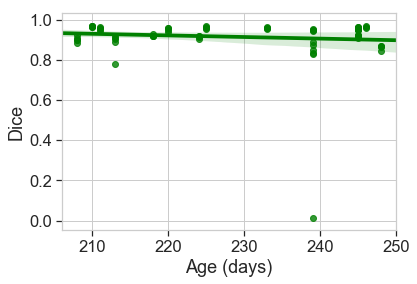

In [27]:
plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.regplot(x=yale_dice_age["Age (days)"], y=yale_dice_age["Dice"], color="g")
#plt.savefig('EBpMdAvsCPZ_black.png',bbox_inches='tight')

[[]]

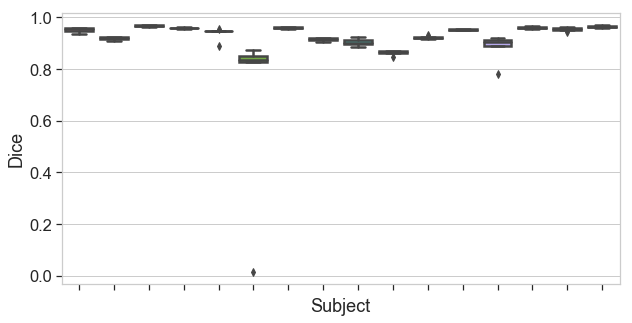

In [28]:
plt.figure(figsize=(10,5)) # this creates a figure 8 inch wide, 4 inch high
g = sns.boxplot(x=yale_dice_age["Subject"], y=yale_dice_age["Dice"])
g.set(xticklabels=[])

In [8]:
motionFD1 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged1.csv')
motionFD09 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged09.csv')
motionFD08 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged08.csv')
motionFD07 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged07.csv')
motionFD06 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged06.csv')
motionFD05 = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/merged05.csv')

In [9]:
motionFD1['VolumesPostCensor'].mean()

59.53719008264463

In [10]:
motionFD09['VolumesPostCensor'].mean()

49.96143250688705

In [11]:
motionFD08['VolumesPostCensor'].mean()

40.672176308539946

In [12]:
motionFD07['VolumesPostCensor'].mean()

31.47382920110193

In [13]:
motionFD06['VolumesPostCensor'].mean()

23.12121212121212

In [14]:
motionFD05['VolumesPostCensor'].mean()

15.950413223140496

In [15]:
motionFD1['Frame Count'].iloc[0:192].mean()
#motionFD1[['Frame Count'].iloc[[0:]].mean()

160.359375

In [16]:
motionFD1['Old-New'] = motionFD1['Frame Count'] - motionFD1['VolumesPostCensor']
motionFD09['Old-New'] = motionFD09['Frame Count'] - motionFD09['VolumesPostCensor']
motionFD08['Old-New'] = motionFD08['Frame Count'] - motionFD08['VolumesPostCensor']
motionFD07['Old-New'] = motionFD07['Frame Count'] - motionFD07['VolumesPostCensor']
motionFD06['Old-New'] = motionFD06['Frame Count'] - motionFD06['VolumesPostCensor']
motionFD05['Old-New'] = motionFD05['Frame Count'] - motionFD05['VolumesPostCensor']

In [17]:
len(motionFD1)

363

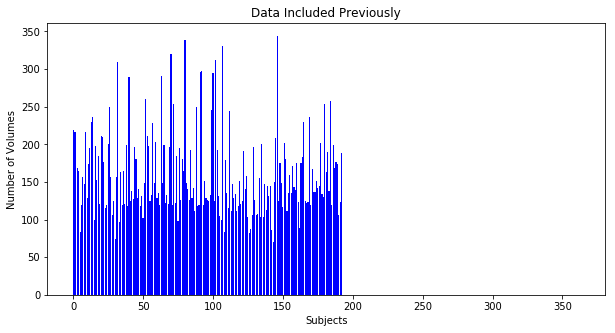

In [18]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

plt.bar(X, A, color = 'b')
#plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Included Previously')
plt.show()

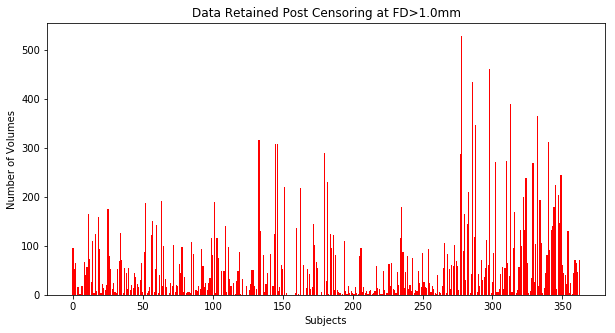

In [19]:
plt.figure(figsize=(10,5))
A = motionFD1['Frame Count']
B = motionFD1['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>1.0mm')
plt.show()

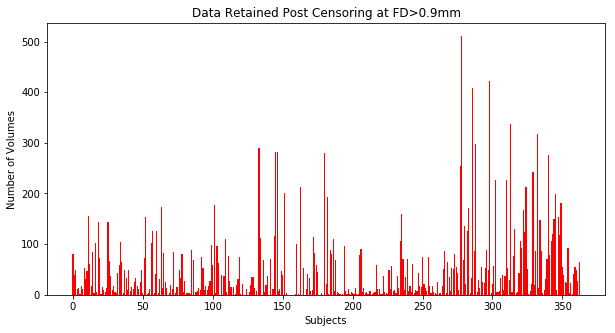

In [20]:
plt.figure(figsize=(10,5))
A = motionFD09['Frame Count']
B = motionFD09['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.9mm')
plt.show()

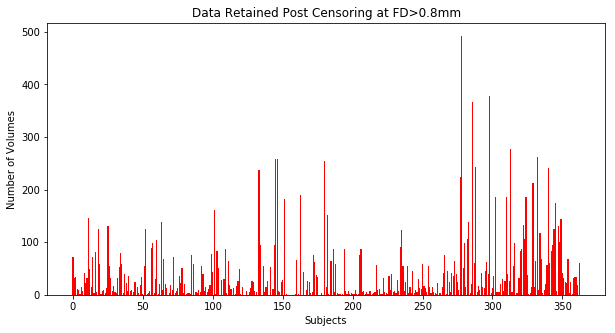

In [21]:
plt.figure(figsize=(10,5))
A = motionFD08['Frame Count']
B = motionFD08['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.8mm')
plt.show()

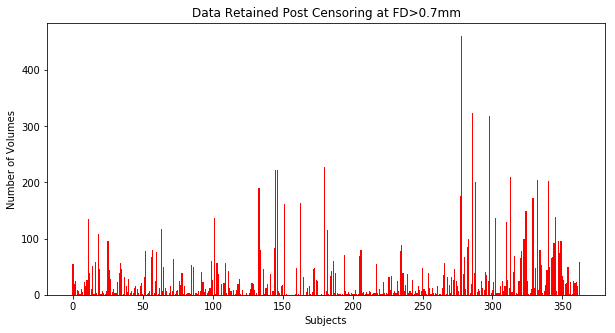

In [22]:
plt.figure(figsize=(10,5))
A = motionFD07['Frame Count']
B = motionFD07['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.7mm')
plt.show()

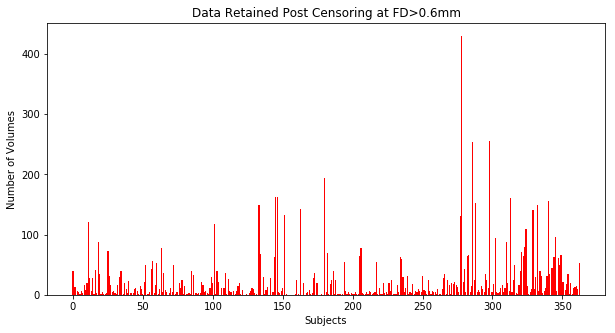

In [23]:
plt.figure(figsize=(10,5))
A = motionFD06['Frame Count']
B = motionFD06['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.6mm')
plt.show()

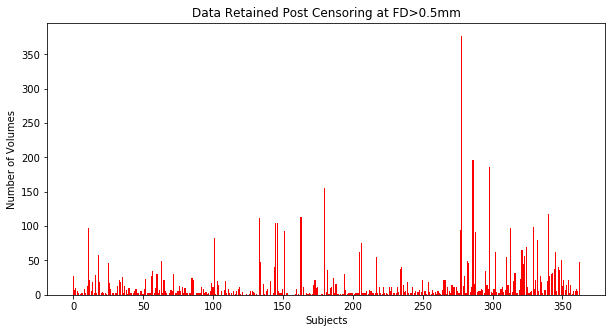

In [24]:
plt.figure(figsize=(10,5))
A = motionFD05['Frame Count']
B = motionFD05['VolumesPostCensor']
X = range(363)

#plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r')
plt.xlabel('Subjects')
plt.ylabel('Number of Volumes')
plt.title('Data Retained Post Censoring at FD>0.5mm')
plt.show()

In [86]:
all_motion = pd.read_csv('../../../Desktop/Work/fetal_data/fetal_motion/fetal_motion_summary_allthresholds.csv')

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

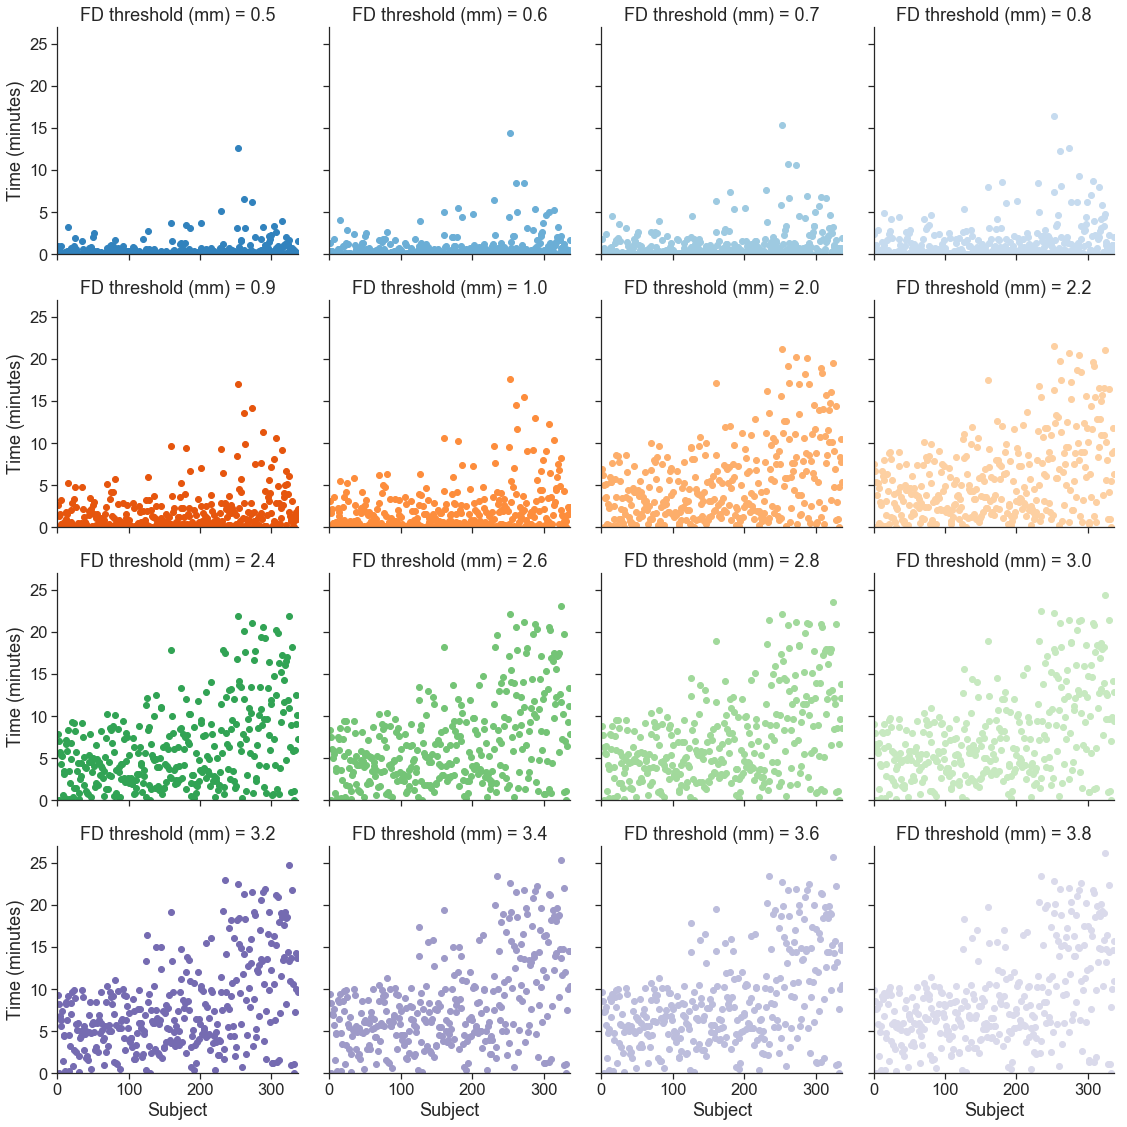

In [90]:
sns.set(style="ticks", font_scale=1.5)
#sns.set_context(font_scale=1.5)
grid = sns.FacetGrid(all_motion, col="FD threshold (mm)", hue="FD threshold (mm)", palette="tab20c", col_wrap=4, height=4)
grid.map(plt.scatter, "Subject", "Time (minutes)", marker="o")
grid.set(xlim=(0, 337), ylim=(0, 27),)